<a href="https://colab.research.google.com/github/Dhatri-nanda/A1/blob/main/Matrix_Tutorial_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as lg

In [11]:
#Loading dataset from the given website ehile removing the first column
info = np.loadtxt("http://web.stanford.edu/class/bios221/data/PaintedTurtles.txt",delimiter=' ', skiprows=1, usecols=(1,2,3) , dtype=int)
print(info)

[[ 98  81  38]
 [103  84  38]
 [103  86  42]
 [105  86  40]
 [109  88  44]
 [123  92  50]
 [123  95  46]
 [133  99  51]
 [133 102  51]
 [133 102  51]
 [134 100  48]
 [136 102  49]
 [137  98  51]
 [138  99  51]
 [141 105  53]
 [147 108  57]
 [149 107  55]
 [153 107  56]
 [155 115  63]
 [155 117  60]
 [158 115  62]
 [159 118  63]
 [162 124  61]
 [177 132  67]
 [ 93  74  37]
 [ 94  78  35]
 [ 96  80  35]
 [101  84  39]
 [102  85  38]
 [103  81  37]
 [104  83  39]
 [106  83  39]
 [107  82  38]
 [112  89  40]
 [113  88  40]
 [114  86  40]
 [116  90  43]
 [117  90  41]
 [117  91  41]
 [119  93  41]
 [120  89  40]
 [120  93  44]
 [121  95  42]
 [125  93  45]
 [127  96  45]
 [128  95  45]
 [131  95  46]
 [135 106  47]]


In [12]:
#Finding mean and standard deviation and normalising the dataset
Info = np.zeros((48,3))

info_1 = info[:,0]
info_2 = info[:,1]
info_3 = info[:,2]

mean_1 = np.sum(info_1)/(info_1.shape)
Info[:,0] = (info_1 - mean_1)/np.std(info_1)


mean_2 = np.sum(info_2)/(info_2.shape)
Info[:,1] = (info_2 - mean_2)/np.std(info_2)


mean_3 = np.sum(info_3)/(info_3.shape)
Info[:,2] = (info_3 - mean_3)/np.std(info_3)

print(Info)


[[-1.31678741 -1.15103099 -1.00341744]
 [-1.07008251 -0.91185572 -1.00341744]
 [-1.07008251 -0.75240554 -0.52177707]
 [-0.97140055 -0.75240554 -0.76259725]
 [-0.77403663 -0.59295536 -0.28095688]
 [-0.0832629  -0.274055    0.44150367]
 [-0.0832629  -0.03487973 -0.0401367 ]
 [ 0.4101469   0.28402063  0.56191377]
 [ 0.4101469   0.5231959   0.56191377]
 [ 0.4101469   0.5231959   0.56191377]
 [ 0.45948788  0.36374572  0.20068349]
 [ 0.55816984  0.5231959   0.32109358]
 [ 0.60751082  0.20429554  0.56191377]
 [ 0.6568518   0.28402063  0.56191377]
 [ 0.80487474  0.76237118  0.80273395]
 [ 1.10092062  1.00154645  1.28437432]
 [ 1.19960258  0.92182136  1.04355414]
 [ 1.3969665   0.92182136  1.16396423]
 [ 1.49564846  1.55962208  2.00683488]
 [ 1.49564846  1.71907226  1.6456046 ]
 [ 1.6436714   1.55962208  1.88642479]
 [ 1.69301238  1.79879735  2.00683488]
 [ 1.84103532  2.27714789  1.76601469]
 [ 2.58115002  2.91494861  2.48847525]
 [-1.56349231 -1.70910662 -1.12382753]
 [-1.51415133 -1.39020626

In [13]:
#The covariance matrix
covar = np.zeros((3,3))
for rows in Info:
    rows_t = np.transpose(rows)
    covar += np.outer(rows_t,rows)
covar = covar/(Info.shape[0]) 
print(covar)

[[1.         0.97831162 0.96469455]
 [0.97831162 1.         0.96057053]
 [0.96469455 0.96057053 1.        ]]


In [17]:
#Finding the eigen values and eigen vector of the covariant matrix
val,vec = lg.eig(covar)
print(val)
print("......")
print(vec)

[2.93573765 0.02141848 0.04284387]
......
[[-0.57879812 -0.74789704 -0.32502731]
 [-0.57798399  0.65741263 -0.48346989]
 [-0.57526276  0.09197088  0.81278171]]


In [20]:
#The princial components based on the above calculated eigen vector matrix
p_1 = vec[:,0]
print('Principal Component 1 = \n',p_1)

p_2 = vec[:,2]
print('\n Principal Component 2 = \n',p_2)

p_3 = vec[:,1]
print('\n Principal Component 2 = \n',p_3)

Principal Component 1 = 
 [-0.57879812 -0.57798399 -0.57526276]

 Principal Component 2 = 
 [-0.32502731 -0.48346989  0.81278171]

 Principal Component 2 = 
 [-0.74789704  0.65741263  0.09197088]


In [26]:
#Finding variances of principal components

p1_t = np.transpose(p_1)
p2_t = np.transpose(p_2)
p3_t = np.transpose(p_3)

var_1 = p1_t@(covar@p_1)
var_2 = p2_t@(covar@p_2)
var_3 = p3_t@(covar@p_3)

print('Variance captured by principal component 1 =',var_1)
print('\nVariance captured by principal component 2 =',var_2)
print('\nVariance captured by principal component 3 =',var_3)

print('\nPercentage of variance captured by PC1 = ',val[0]*100/np.sum(val))
print('\nPercentage of variance captured by PC2 = ',val[2]*100/np.sum(val))
print('\nPercentage of variance captured by PC3 = ',val[1]*100/np.sum(val))


Variance captured by principal component 1 = 2.9357376530766643

Variance captured by principal component 2 = 0.04284386617352037

Variance captured by principal component 3 = 0.02141848074981464

Percentage of variance captured by PC1 =  97.85792176922217

Percentage of variance captured by PC2 =  1.4281288724506798

Percentage of variance captured by PC3 =  0.7139493583271532


In [27]:
#The combined variance of variance 1 and variance 2
var = var_1 + var_2
print(var)
#Percentage of combined variance by the first two principal components
print((val[0]+val[2])*100/np.sum(val))

2.9785815192501848
99.28605064167284


In [37]:
A = np.zeros((3,2))
A[:,0] = p_1
A[:,1] = p_2
Info_mod = []
for rows in Info:
    Info_mod.append([(np.transpose(A)@rows)[0],(np.transpose(A)@rows)[1]])
Info_Mod = np.transpose(X_modified)    
print(Info_Mod)    

[[ 2.00466025e+00  1.72362844e+00  1.35439901e+00  1.43581697e+00
   9.52353680e-01 -4.73888072e-02  9.14414833e-02 -7.24799696e-01
  -8.63039174e-01 -8.63039174e-01 -5.91635662e-01 -8.10179689e-01
  -7.92953735e-01 -8.67592028e-01 -1.36828127e+00 -1.95494131e+00
  -1.82744354e+00 -2.01094484e+00 -2.92157248e+00 -2.80592980e+00
  -2.93798044e+00 -3.17404582e+00 -3.39766529e+00 -4.61028555e+00
   2.53927880e+00  2.46493592e+00  2.31565933e+00  1.71147793e+00
   1.70610708e+00  1.93113536e+00  1.67188235e+00  1.61476542e+00
   1.70155422e+00  1.09766822e+00  1.11518958e+00  1.17879077e+00
   7.29552205e-01  8.39528623e-01  7.93448797e-01  6.44172212e-01
   8.69200492e-01  4.07811419e-01  4.25628185e-01  1.95751645e-01
   3.95233855e-04  1.79165935e-02 -1.37026248e-01 -8.27405642e-01]
 [ 1.68921347e-01 -2.68985249e-02  2.87480600e-01  5.96720252e-02
   3.09902486e-01  5.18406169e-01  1.13036416e-02  1.86088867e-01
   7.04548258e-02  7.04548258e-02 -1.62094344e-01 -1.73390916e-01
   1.6048

Text(0, 0.5, 'Dimension_1')

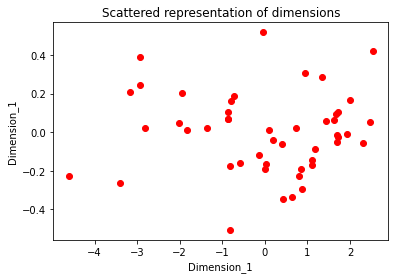

In [39]:
#Plotting
plt.scatter(Info_Mod[0], Info_Mod[1], c ="red")
plt.title("Scattered representation of dimensions")
plt.xlabel("Dimension_1")
plt.ylabel("Dimension_1")